# Classification Tasks

* Below is a simple Python script using the scikit-learn library to implement logistic regression for classifying the Iris dataset.
* Ensure you have scikit-learn and other necessary libraries installed before running the script.


### Iris Dataset:
1. **Nature**: The Iris dataset is a dataset of flower characteristics. It includes measurements of sepal length, sepal width, petal length, and petal width for three species of iris flowers (setosa, versicolor, and virginica). It is commonly used for classification tasks.
2. **Structure**: Each sample in the Iris dataset represents an iris flower, and the features are numerical measurements of the flower's parts.
3. **Purpose**: The Iris dataset is often used for practicing and demonstrating classification algorithms. The goal is to classify iris flowers into their correct species based on the given measurements.



Accuracy: 1.00


/Users/admin/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x432 with 0 Axes>

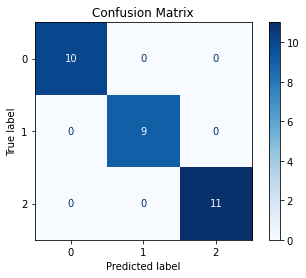


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



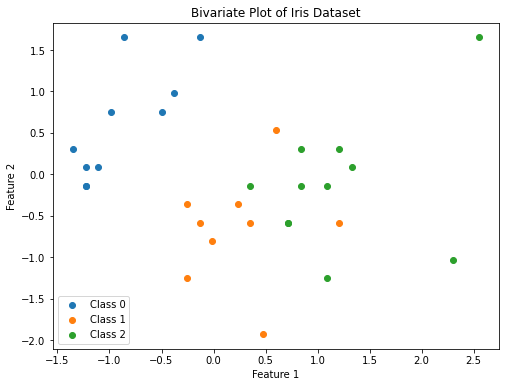

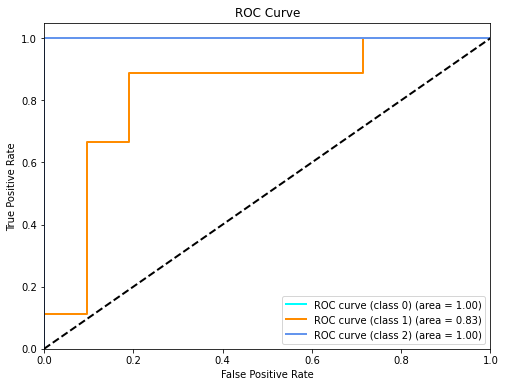

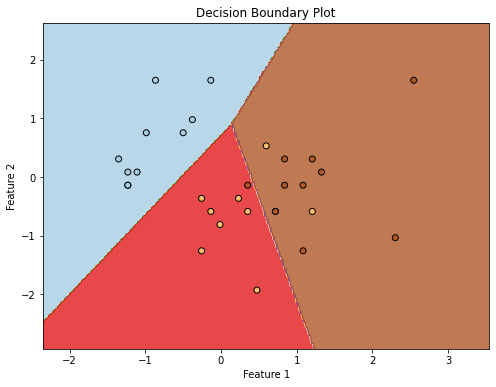

In [4]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from itertools import cycle
import numpy as np


# Step 1: Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize the features (optional but recommended for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Create a logistic regression model
model = LogisticRegression()

# Step 5: Train the model on the training set
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
predictions = model.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Step 12: Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Step 8: Display classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Step 9: Bivariate Plot
plt.figure(figsize=(8, 6))

# Plot each class
for i in range(3):
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], label=f'Class {i}')

plt.title('Bivariate Plot of Iris Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Step 10: ROC Curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Learn to predict each class against the other
classifier = OneVsRestClassifier(LogisticRegression())
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Step 11: Decision Boundary Plot
# Only consider the first two features for simplicity
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

# Train a new model on 2D data
model_2d = LogisticRegression()
model_2d.fit(X_train_2d, y_train)

# Plot decision boundary
h = .02
x_min, x_max = X_test_2d[:, 0].min() - 1, X_test_2d[:, 0].max() + 1
y_min, y_max = X_test_2d[:, 1].min() - 1, X_test_2d[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Scatter plot of data points
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired)
plt.title('Decision Boundary Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Let's discuss each result produced by the script:

### Bivariate Plot:
The bivariate plot shows a scatter plot of the first two features of the Iris dataset. Each class is represented by a different color. This visualization helps us understand the distribution of data points in a two-dimensional space. In the Iris dataset, it can provide insights into the separability of different classes based on these two features.

### Confusion Matrix:
A confusion matrix is a table that summarizes the performance of a classification algorithm. It provides information about true positive, true negative, false positive, and false negative predictions. It's a useful tool to evaluate the performance of a model, especially in multi-class classification problems.

To include a confusion matrix in your script, you can use `confusion_matrix` from the `sklearn.metrics` module.

### Classification Report:
The classification report provides a summary of various metrics for each class in the classification task. It includes precision, recall, and F1-score, which are useful for evaluating the model's performance on each class. The `classification_report` function in scikit-learn generates this information based on the actual and predicted class labels.

### ROC Curve:
The ROC curve is a graphical representation of the model's performance across different thresholds. It plots the true positive rate against the false positive rate for different threshold values. The area under the ROC curve (AUC-ROC) is a commonly used metric to assess the overall performance of a classification model. The script uses the `roc_curve` and `auc` functions to create and plot the ROC curve.

### Decision Boundary Plot:
The decision boundary plot shows the decision boundaries of the logistic regression model for the first two features of the Iris dataset. This helps visualize how the model separates different classes in the input feature space. Keep in mind that in the provided script, the decision boundary is based on only two features for simplicity.

In summary, these visualizations and metrics collectively provide a comprehensive understanding of the logistic regression model's performance on the Iris dataset, including its ability to classify, the trade-off between true positive and false positive rates, and the decision boundaries in the feature space.

## Next we Perform Image Classification 

* In this example, we use the digits dataset, which consists of 8 x 8 images of handwritten digits (0 through 9). 
* The script follows similar steps as before, including training the logistic regression model, evaluating its performance, and displaying a confusion matrix. Additionally, it shows 10 random test images along with their predicted and actual labels for visual inspection.

* You can adapt this script to other image classification tasks by replacing the dataset and adjusting the code accordingly.

### Digits Dataset:
1. **Nature**: The Digits dataset is a dataset of hand-written digits (0 through 9). It consists of 8x8 pixel images representing grayscale images of handwritten digits.
2. **Structure**: Each sample in the Digits dataset is an 8x8 image, and each pixel is a feature. The values in each pixel represent the grayscale intensity.
3. **Purpose**: The Digits dataset is commonly used for practicing image classification algorithms. The goal is to correctly classify hand-written digits based on the pixel values of the images.


Accuracy: 0.97


/Users/admin/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/admin/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 2700x2160 with 0 Axes>

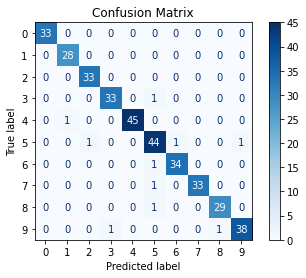


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.94      0.93        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



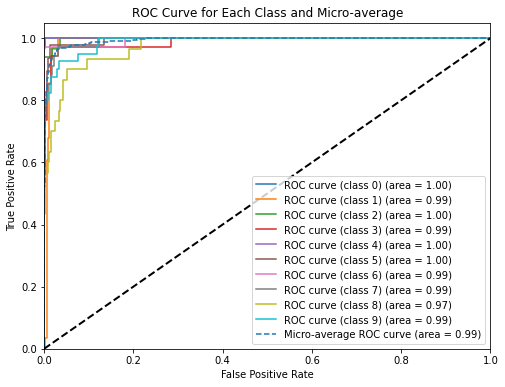

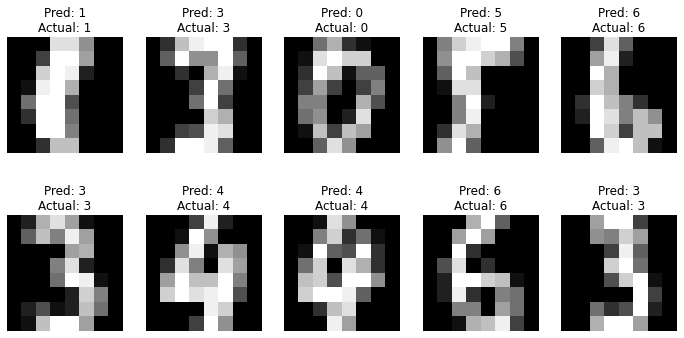

In [18]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Step 1: Load the Digits dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a logistic regression model
model = LogisticRegression(max_iter=1000)

# Step 4: Train the model on the training set
model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
predictions = model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Step 7: Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(15, 12), dpi=180)
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Step 8: Display classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Step 9: ROC Curve and ROC-AUC
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Compute decision function
y_score = model.decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro-average ROC-AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})', linestyle='--')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class and Micro-average')
plt.legend(loc="lower right")
plt.show()


# Step 10: Display the original images and predicted labels
plt.figure(figsize=(12, 6))
for i, index in enumerate(random_sample_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[index].reshape(8, 8), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nActual: {y_test[index]}")
    plt.axis('off')

plt.show()


In summary, while both datasets are used for classification tasks, the Iris dataset deals with numerical measurements of flower characteristics, and the Digits dataset deals with pixel values of hand-written digit images. The Iris dataset is more about traditional tabular data, whereas the Digits dataset involves images.